In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [265]:
df2017 = pd.read_csv('data/finbraRREO2017.csv', skiprows=5, sep=';', encoding='latin1')
df2018 = pd.read_csv('data/finbraRREO2018.csv', skiprows=5, sep=';', encoding='latin1')
df2019 = pd.read_csv('data/finbraRREO2019.csv', skiprows=5, sep=';', encoding='latin1')
df2020 = pd.read_csv('data/finbraRREO2020.csv', skiprows=5, sep=';', encoding='latin1')
df2021 = pd.read_csv('data/finbraRREO2021.csv', skiprows=5, sep=';', encoding='latin1')
df2022 = pd.read_csv('data/finbraRREO2022.csv', skiprows=5, sep=';', encoding='latin1')
df2023 = pd.read_csv('data/finbraRREO2023.csv', skiprows=5, sep=';', encoding='latin1')

In [266]:
# alguns exemplos de instituições / prefeituras
pfs = df2017['Instituição'].unique()
[pf[24:] for pf in pfs][:5]

eoi = ['João Pessoa', 'Cabedelo', 'Santa Rita', 'Bayeux', 'Campina Grande', 'Cajazeiras', 'Patos']

In [267]:

df2017 = df2017[df2017['Instituição'].str.contains('|'.join(eoi))]
df2017['Instituição'].unique()

array(['Prefeitura Municipal de Santa Rita - PB',
       'Prefeitura Municipal de Campina Grande - PB',
       'Prefeitura Municipal de Bayeux - PB',
       'Prefeitura Municipal de Cajazeiras - PB',
       'Prefeitura Municipal de João Pessoa - PB',
       'Prefeitura Municipal de Cabedelo - PB',
       'Prefeitura Municipal de Patos - PB'], dtype=object)

In [268]:
df2017 = df2017[df2017['Conta'] == 'IPTU']
df2017 = df2017[df2017['Coluna'] == 'TOTAL (ÚLTIMOS 12 MESES)']
df2017

,Instituição,Cod.IBGE,UF,População,Coluna,Conta,Identificador da Conta,Valor
6199,Prefeitura Municipal de Santa Rita - PB,2513703,PB,135915,TOTAL (ÚLTIMOS 12 MESES),IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,"534360,74"
7963,Prefeitura Municipal de Campina Grande - PB,2504009,PB,407754,TOTAL (ÚLTIMOS 12 MESES),IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,"18142999,19"
22182,Prefeitura Municipal de Bayeux - PB,2501807,PB,96583,TOTAL (ÚLTIMOS 12 MESES),IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,"1215987,07"
33159,Prefeitura Municipal de Cajazeiras - PB,2503704,PB,61816,TOTAL (ÚLTIMOS 12 MESES),IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,"1143238,51"
37014,Prefeitura Municipal de João Pessoa - PB,2507507,PB,801718,TOTAL (ÚLTIMOS 12 MESES),IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,"66257465,74"
38665,Prefeitura Municipal de Cabedelo - PB,2503209,PB,66858,TOTAL (ÚLTIMOS 12 MESES),IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,"4930549,31"
52405,Prefeitura Municipal de Patos - PB,2510808,PB,107067,TOTAL (ÚLTIMOS 12 MESES),IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,"1699450,7"


In [269]:
for i in range(2017, 2024):
    exec(f"df{i}['Instituição'] = df{i}['Instituição'].str[24:]")
    exec(f"df{i} = df{i}[df{i}['Instituição'].str.contains('|'.join(eoi))]")
    exec(f"df{i} = df{i}[df{i}['Conta'] == 'IPTU']")
    exec(f"df{i} = df{i}[df{i}['Coluna'] == 'TOTAL (ÚLTIMOS 12 MESES)']") # soma dos 12 meses
    exec(f"df{i} = df{i}[['Instituição', 'Valor']]")
    exec(f"df{i}['Valor'] = df{i}['Valor'].str.replace(',', '.').astype(float)")

In [270]:
somaIPTUS = {}

for i in range(2017, 2024):
    exec(f"somaIPTUS[{i}] = df{i}['Valor'].sum()")

somaIPTUS = pd.Series(somaIPTUS)

In [271]:
pcts = []

for i in range(2017, 2024):
    pct = eval(f"df{i}['Valor'] / somaIPTUS[{i}] * 100")
    pct = list(pct)
    pct = [round(p, 4) for p in pct]
    pcts.append(pct)

pcts

[[0.5689, 19.3167, 1.2946, 1.2172, 70.5437, 5.2495, 1.8094],
 [4.797, 68.0813, 1.0626, 1.2243, 1.699, 1.2319, 21.9038],
 [1.2408, 1.1783, 18.7198, 71.7656, 4.5354, 1.2515, 1.3085],
 [4.7442, 1.0194, 19.4227, 0.8739, 71.4454, 1.0367, 1.4577],
 [1.8575, 4.8592, 19.7875, 69.3601, 2.1802, 0.4067, 1.5489],
 [67.6528, 4.8382, 1.1442, 3.0313, 2.8354, 2.7129, 17.7851],
 [18.0905, 6.2395, 67.2941, 0.5174, 1.8593, 3.3741, 2.6251]]

In [272]:
# fazer o crescimento percentual de um ano para o outro 
# comparando apenas com os valores de pcts anteriores

crcs = []
for index, ano in enumerate(range(2017, 2024)):
    if index == 0:
        crc = [0] * len(pcts[index])
    else:
        crc = [round((pcts[index][i] - pcts[index-1][i]), 4) for i in range(len(pcts[index]))]
    crcs.append(crc)

crcs = np.array(crcs, dtype=float)
crcs

array([[ 0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00],
       [ 4.22810e+00,  4.87646e+01, -2.32000e-01,  7.10000e-03,
        -6.88447e+01, -4.01760e+00,  2.00944e+01],
       [-3.55620e+00, -6.69030e+01,  1.76572e+01,  7.05413e+01,
         2.83640e+00,  1.96000e-02, -2.05953e+01],
       [ 3.50340e+00, -1.58900e-01,  7.02900e-01, -7.08917e+01,
         6.69100e+01, -2.14800e-01,  1.49200e-01],
       [-2.88670e+00,  3.83980e+00,  3.64800e-01,  6.84862e+01,
        -6.92652e+01, -6.30000e-01,  9.12000e-02],
       [ 6.57953e+01, -2.10000e-02, -1.86433e+01, -6.63288e+01,
         6.55200e-01,  2.30620e+00,  1.62362e+01],
       [-4.95623e+01,  1.40130e+00,  6.61499e+01, -2.51390e+00,
        -9.76100e-01,  6.61200e-01, -1.51600e+01]])

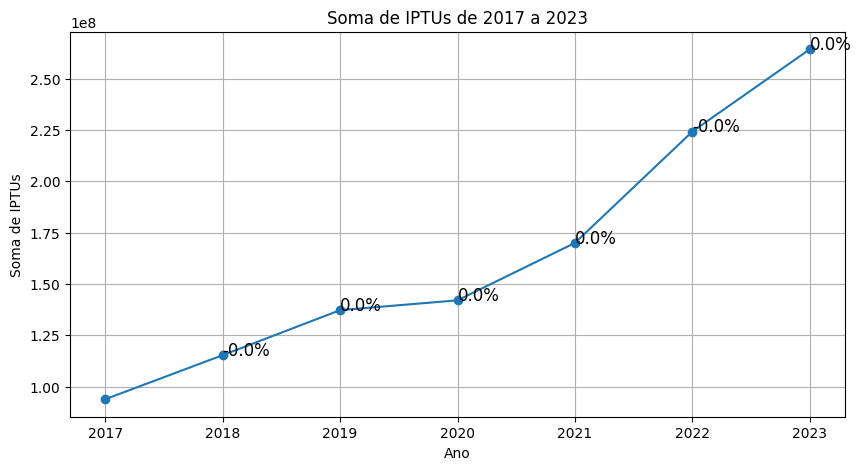

In [273]:
#plottar a soma de iptus
plt.figure(figsize=(10, 5))
plt.plot(range(2017, 2024), somaIPTUS.values, marker='o')
# colocar em texto a diferença percentual de um ano para o outro
for i, ano in enumerate(range(2017, 2024)):
    if i == 0:
        continue
    plt.text(ano, somaIPTUS.values[i], f'{(round(sum(crcs[i]), 2) - round(sum(crcs[i-1]), 2)) * 100}%', fontsize=12)

plt.title('Soma de IPTUs de 2017 a 2023')
plt.xlabel('Ano')
plt.ylabel('Soma de IPTUs')
plt.grid()
plt.show()

In [274]:
for ano in range(2017, 2024):
    exec(f"df{ano}['Ano'] = {ano}")

In [275]:
df_all = pd.concat([df2017, df2018, df2019, df2020, df2021, df2022, df2023])
df_all.head()

,Instituição,Valor,Ano
6199,Santa Rita - PB,534360.74,2017
7963,Campina Grande - PB,18142999.19,2017
22182,Bayeux - PB,1215987.07,2017
33159,Cajazeiras - PB,1143238.51,2017
37014,João Pessoa - PB,66257465.74,2017


In [276]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage

In [277]:
X = df_all.pivot(index='Instituição', columns='Ano', values='Valor').fillna(0)
X.head()

Ano,2017,2018,2019,2020,2021,2022,2023
Instituição,,,,,,,
Bayeux - PB,1215987.07,1225846.13,1703389.46,1.472575e+06,6.913156e+05,2.565304e+06,1.367216e+06
Cabedelo - PB,4930549.31,5533702.22,6226065.04,6.739020e+06,8.260634e+06,1.084686e+07,1.648844e+07
Cajazeiras - PB,1143238.51,1421087.44,1796217.06,1.241371e+06,3.157682e+06,6.795953e+06,8.916355e+06
Campina Grande - PB,18142999.19,25267802.50,25697950.52,2.758965e+07,3.363870e+07,3.987251e+07,4.780559e+07
João Pessoa - PB,66257465.74,78537158.84,98517376.01,1.014871e+08,1.179121e+08,1.516716e+08,1.778302e+08


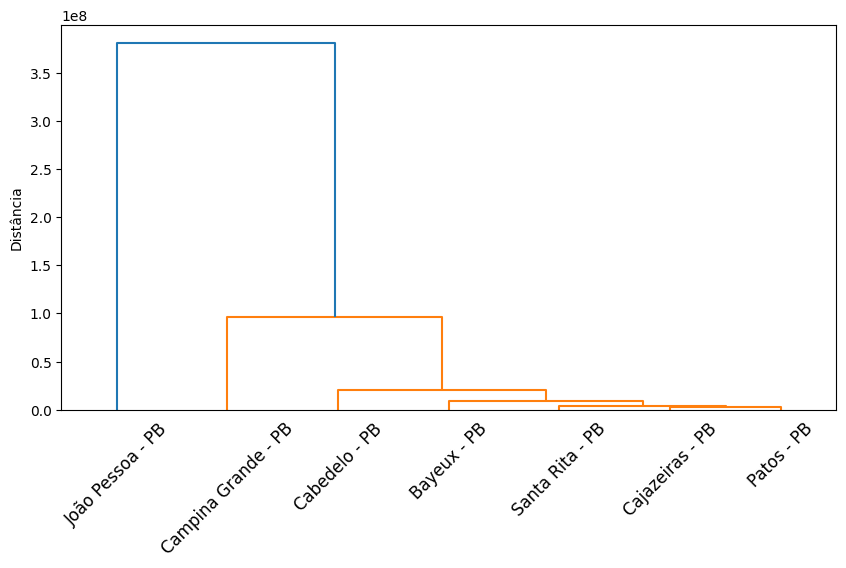

In [278]:
model = AgglomerativeClustering(n_clusters=2, linkage='ward', metric='euclidean')
cluster = model.fit_predict(X) # fit: treinar o modelo
                               # predict: prever o cluster

X['ClusterAgg'] = cluster
X.head()

# plot dendogram
Z = linkage(X.iloc[:, :-1], 'ward')

plt.figure(figsize=(10, 5))
dendrogram(Z, labels=X.index)
plt.ylabel('Distância')
#rotate x axis labels
plt.xticks(rotation=45)
plt.show()

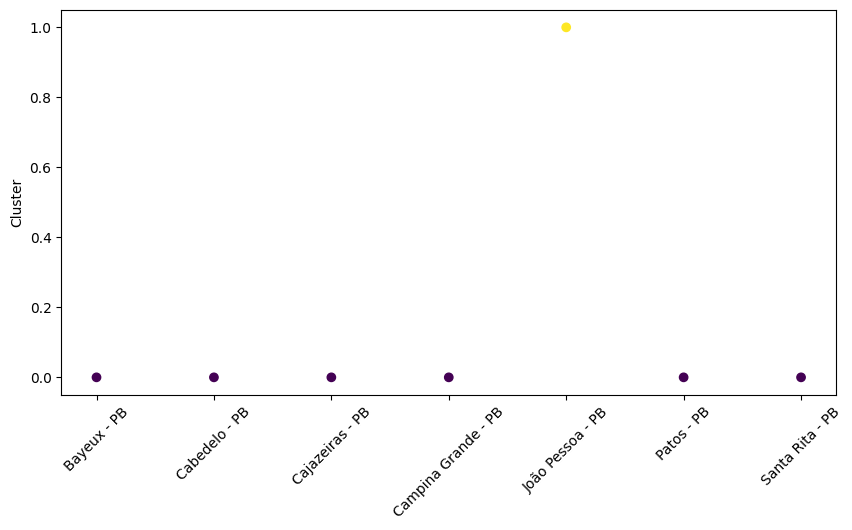

In [279]:
model = KMeans(n_clusters=2)
cluster = model.fit_predict(X.iloc[:, :-1])

X['ClusterKMeans'] = cluster
X.head()


# plot scatter
plt.figure(figsize=(10, 5))
plt.scatter(X.index, X['ClusterKMeans'], c=X['ClusterKMeans'])
plt.ylabel('Cluster')
plt.xticks(rotation=45)
plt.show()

In [280]:
df_all.head()

,Instituição,Valor,Ano
6199,Santa Rita - PB,534360.74,2017
7963,Campina Grande - PB,18142999.19,2017
22182,Bayeux - PB,1215987.07,2017
33159,Cajazeiras - PB,1143238.51,2017
37014,João Pessoa - PB,66257465.74,2017


In [281]:
df2017_ = pd.read_csv('data/finbraRREO2017.csv', skiprows=5, sep=';', encoding='latin1')
df2018_ = pd.read_csv('data/finbraRREO2018.csv', skiprows=5, sep=';', encoding='latin1')
df2019_ = pd.read_csv('data/finbraRREO2019.csv', skiprows=5, sep=';', encoding='latin1')
df2020_ = pd.read_csv('data/finbraRREO2020.csv', skiprows=5, sep=';', encoding='latin1')
df2021_ = pd.read_csv('data/finbraRREO2021.csv', skiprows=5, sep=';', encoding='latin1')
df2022_ = pd.read_csv('data/finbraRREO2022.csv', skiprows=5, sep=';', encoding='latin1')
df2023_ = pd.read_csv('data/finbraRREO2023.csv', skiprows=5, sep=';', encoding='latin1')


for i in range(2017, 2024):
    exec(f"df{i}_['Instituição'] = df{i}_['Instituição'].str[24:]")
    exec(f"df{i}_ = df{i}_[df{i}_['Instituição'].str.contains('Conde')]")
    exec(f"df{i}_ = df{i}_[df{i}_['Conta'] == 'IPTU']")
    exec(f"df{i}_ = df{i}_[df{i}_['Coluna'] == 'TOTAL (ÚLTIMOS 12 MESES)']") # soma dos 12 meses
    exec(f"df{i}_ = df{i}_[['Instituição', 'Valor']]")
    exec(f"df{i}_['Valor'] = df{i}_['Valor'].str.replace(',', '.').astype(float)")


somaIPTUS_ = {}

for i in range(2017, 2024):
    exec(f"somaIPTUS_[{i}] = df{i}_['Valor'].sum()")

for i, ano in enumerate(range(2017, 2024)):
    exec(f"df{ano}_['Ano'] = {ano}")

somaIPTUS_ = pd.Series(somaIPTUS_)

df_conde = pd.concat([df2017_, df2018_, df2019_, df2020_, df2021_, df2022_, df2023_])

for i in range(2017, 2024):
    exec('del(df' + str(i) + '_)')

In [282]:
X

Ano,2017,2018,2019,2020,2021,2022,2023,ClusterAgg,ClusterKMeans
Instituição,,,,,,,,,
Bayeux - PB,1215987.07,1225846.13,1703389.46,1.472575e+06,6.913156e+05,2.565304e+06,1.367216e+06,0,0
Cabedelo - PB,4930549.31,5533702.22,6226065.04,6.739020e+06,8.260634e+06,1.084686e+07,1.648844e+07,0,0
Cajazeiras - PB,1143238.51,1421087.44,1796217.06,1.241371e+06,3.157682e+06,6.795953e+06,8.916355e+06,0,0
Campina Grande - PB,18142999.19,25267802.50,25697950.52,2.758965e+07,3.363870e+07,3.987251e+07,4.780559e+07,0,0
João Pessoa - PB,66257465.74,78537158.84,98517376.01,1.014871e+08,1.179121e+08,1.516716e+08,1.778302e+08,1,1
Patos - PB,1699450.70,1412375.92,1718063.77,2.070686e+06,2.633051e+06,6.082073e+06,6.937173e+06,0,0
Santa Rita - PB,534360.74,1959884.53,1617591.31,1.448013e+06,3.706302e+06,6.356795e+06,4.913329e+06,0,0


In [283]:
df_conde.reset_index(drop=True, inplace=True)
df_conde

,Instituição,Valor,Ano
0,Conde - PB,1991099.43,2017
1,Conde - PB,2324804.28,2018
2,Conde - PB,3579377.06,2019
3,Conde - PB,3657900.19,2020
4,Conde - PB,4975985.00,2021
5,Conde - PB,6652614.43,2022
6,Conde - PB,8876236.69,2023


In [284]:
X[X['ClusterKMeans'] == 0].values

array([[ 1215987.07,  1225846.13,  1703389.46,  1472575.02,   691315.64,
         2565304.16,  1367216.44,        0.  ,        0.  ],
       [ 4930549.31,  5533702.22,  6226065.04,  6739019.76,  8260634.1 ,
        10846857.55, 16488437.92,        0.  ,        0.  ],
       [ 1143238.51,  1421087.44,  1796217.06,  1241370.85,  3157681.85,
         6795953.28,  8916354.92,        0.  ,        0.  ],
       [18142999.19, 25267802.5 , 25697950.52, 27589652.55, 33638697.83,
        39872512.39, 47805592.57,        0.  ,        0.  ],
       [ 1699450.7 ,  1412375.92,  1718063.77,  2070685.99,  2633050.55,
         6082072.96,  6937172.93,        0.  ,        0.  ],
       [  534360.74,  1959884.53,  1617591.31,  1448013.08,  3706301.93,
         6356794.72,  4913328.79,        0.  ,        0.  ]])

In [285]:
X[X['ClusterKMeans'] == 0][2017]

Instituição
Bayeux - PB             1215987.07
Cabedelo - PB           4930549.31
Cajazeiras - PB         1143238.51
Campina Grande - PB    18142999.19
Patos - PB              1699450.70
Santa Rita - PB          534360.74
Name: 2017, dtype: float64

In [286]:
# Função para calcular a distância Euclidiana
def distancia_euclidiana(serie1, serie2):
    return np.sqrt(np.sum((serie1 - serie2) ** 2))

serie_conde = df_conde['Valor']
# Calcular a média das distâncias para o grupo 1
#distancias_grupo1 = []

medias1 = []
for i, ano in enumerate(range(2017, 2024)):
    serie_grupo = X[X['ClusterKMeans'] == 0][ano]
    distancias_grupo1 = []
    for j in range(len(serie_grupo)):
        distancias_grupo1.append(distancia_euclidiana(serie_conde, serie_grupo[j]))
    media_distancia_grupo1 = np.mean(distancias_grupo1)
    medias1.append(media_distancia_grupo1)

medias1 = np.array(medias1, dtype=float)
medias1 = np.mean(medias1)

# Calcular a média das distâncias para o grupo 2

medias2 = []
for i, ano in enumerate(range(2017, 2024)):
    serie_grupo = X[X['ClusterKMeans'] == 1][ano]
    distancias_grupo2 = []
    for j in range(len(serie_grupo)):
        distancias_grupo2.append(distancia_euclidiana(serie_conde, serie_grupo[j]))
    media_distancia_grupo2 = np.mean(distancias_grupo2)
    medias2.append(media_distancia_grupo2)

medias2 = np.array(medias2, dtype=float)
medias2 = np.mean(medias2)

# Classificar a cidade do Conde
if media_distancia_grupo1 < media_distancia_grupo2:
    classificacao = "Grupo 1"
else:
    classificacao = "Grupo 2"

print(f"A cidade do Conde foi classificada no {classificacao}.")

A cidade do Conde foi classificada no Grupo 1.


/tmp/ipykernel_10342/902901194.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distancias_grupo1.append(distancia_euclidiana(serie_conde, serie_grupo[j]))
/tmp/ipykernel_10342/902901194.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distancias_grupo2.append(distancia_euclidiana(serie_conde, serie_grupo[j]))


In [287]:
conde = {}

for i in range(2017, 2024):
    exec(f"conde[{i}] = df_conde[df_conde['Ano'] == {i}]['Valor'].values[0]")

conde['ClusterAgg'] = 0
conde['ClusterKMeans'] = np.nan
conde['Instituição'] = 'Conde'

# set conde as index for 'Instituição' in X
condedf = pd.DataFrame(conde, index=[0])
condedf.set_index('Instituição', inplace=True)


X = pd.concat([X, condedf])
X

,2017,2018,2019,2020,2021,2022,2023,ClusterAgg,ClusterKMeans
Instituição,,,,,,,,,
Bayeux - PB,1215987.07,1225846.13,1703389.46,1.472575e+06,6.913156e+05,2.565304e+06,1.367216e+06,0,0.0
Cabedelo - PB,4930549.31,5533702.22,6226065.04,6.739020e+06,8.260634e+06,1.084686e+07,1.648844e+07,0,0.0
Cajazeiras - PB,1143238.51,1421087.44,1796217.06,1.241371e+06,3.157682e+06,6.795953e+06,8.916355e+06,0,0.0
Campina Grande - PB,18142999.19,25267802.50,25697950.52,2.758965e+07,3.363870e+07,3.987251e+07,4.780559e+07,0,0.0
João Pessoa - PB,66257465.74,78537158.84,98517376.01,1.014871e+08,1.179121e+08,1.516716e+08,1.778302e+08,1,1.0
Patos - PB,1699450.70,1412375.92,1718063.77,2.070686e+06,2.633051e+06,6.082073e+06,6.937173e+06,0,0.0
Santa Rita - PB,534360.74,1959884.53,1617591.31,1.448013e+06,3.706302e+06,6.356795e+06,4.913329e+06,0,0.0
Conde,1991099.43,2324804.28,3579377.06,3.657900e+06,4.975985e+06,6.652614e+06,8.876237e+06,0,NaN
